In [21]:
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
plt.style.use('fivethirtyeight')

NameError: name 't' is not defined

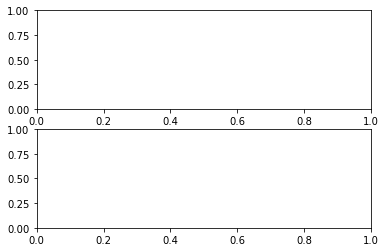

In [8]:
fig,axs = plt.subplots(2)
axs[1].pcolormesh(t, f[:10], Sxx[:10,:], shading='gouraud')
axs[1].set_title('Spectogram')
axs[1].set_ylabel('Frequency [Hz]')
axs[1].set_xlabel('Time [sec]')
plt.show()

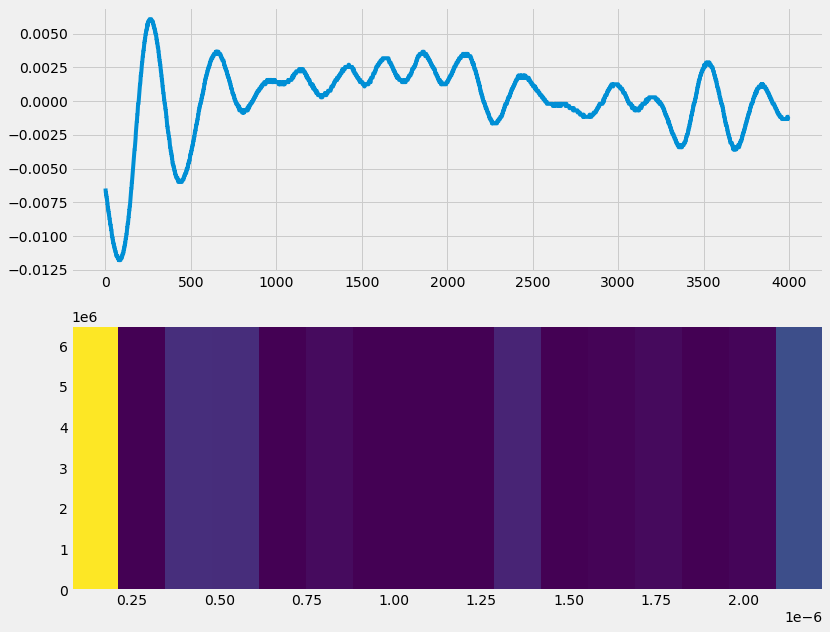

In [91]:
# Lista de arquivos ossos desmineralização 1
lista_arq_desm1=os.listdir('Dados/desm1/')
# Lista de arquivos ossos desmineralização 2
lista_arq_desm2=os.listdir('Dados/desm2/')
# Lista de arquivos ossos desmineralização 3
lista_arq_desm3=os.listdir('Dados/desm3/')
fig,axs=plt.subplots(2)
fig.set_size_inches(12,10)
with open('Dados/desm1/'+lista_arq_desm1[15],'r') as f:
    x = f.readlines()
    dt = float(x[0])
    x = np.array(x[2000:6000]).astype(float)
    axs[0].plot(x)
    fs = 1.0/dt
    f, t, Sxx = signal.spectrogram(x, fs)
    axs[1].pcolormesh(t,f[:2],Sxx[:2,:])

In [78]:
data = []
classes = []

# Lista de arquivos ossos desmineralização 1
lista_arq_desm1=os.listdir('Dados/desm1/')
# Lista de arquivos ossos desmineralização 2
lista_arq_desm2=os.listdir('Dados/desm2/')
# Lista de arquivos ossos desmineralização 3
lista_arq_desm3=os.listdir('Dados/desm3/')
print(len(lista_arq_desm1),len(lista_arq_desm2),len(lista_arq_desm3))
print(f'Total = {total}')
freq_cut = 2
for arq in lista_arq_desm1[:38]:
    with open('Dados/desm1/'+arq,'r') as f:

        x = f.readlines()
        dt = float(x[0])
        fs = 1.0/dt
        x=np.array(x).astype(float)
        f, t, Sxx = signal.spectrogram(x, fs)
        x = Sxx[:freq_cut,:]
        x = x/x.max()
        data.append(x)
        classes.append([1,0,0])

for arq in lista_arq_desm2[:38]:
    with open('Dados/desm2/'+arq,'r') as f:

        x = f.readlines()
        dt = float(x[0])
        fs = 1.0/dt
        x=np.array(x).astype(float)
        f, t, Sxx = signal.spectrogram(x, fs)
        x = Sxx[:freq_cut,:]
        x = x/x.max()
        data.append(x)
        classes.append([0,1,0])

for arq in lista_arq_desm3[:38]:
    with open('Dados/desm3/'+arq,'r') as f:

        x = f.readlines()
        dt = float(x[0])
        fs = 1.0/dt
        x=np.array(x).astype(float)
        f, t, Sxx = signal.spectrogram(x, fs)
        x = Sxx[:freq_cut,:]
        x = x/x.max()
        data.append(x)
        classes.append([0,0,1])

data = np.array(data)
data = data.reshape(data.shape[0],data.shape[1],data.shape[2],1)
classes = np.array(classes)
data.shape,classes.shape

319 458 419
Total = 1196


((114, 2, 71, 1), (114, 3))

# Train, test split

In [85]:
test_size = 0.4
X_train,X_test,y_train,y_test = train_test_split(data,classes,test_size = test_size)

activation = 'relu'
model = Sequential()
model.add(Conv2D(8, (2,2), activation = activation, padding = 'same', input_shape = X_train.shape[1:], kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(8, (2,2), activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(8, (2,2), activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Conv2D(8, (2,2), activation = activation, padding = 'same', kernel_initializer = 'he_uniform'))
model.add(BatchNormalization()) 
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = activation, kernel_initializer = 'he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(len(classes[0]), activation = 'softmax'))
# specify the loss function and optimizer
model.compile(loss= 'categorical_crossentropy',
              optimizer=tf.optimizers.Adam(0.001),
              metrics = ['accuracy'])
hist = model.fit(x=X_train, y=y_train, validation_split=0.33,batch_size=16, epochs=100, verbose=1, shuffle=True, use_multiprocessing=True)
# save the model
model.evaluate(x=X_test, y=y_test, batch_size=64, verbose=1, use_multiprocessing=True)

Epoch 1/100
3/3 [==============================] - 0s 72ms/step - loss: 1.6962 - accuracy: 0.4222 - val_loss: 1.0983 - val_accuracy: 0.2174
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 2.2427 - accuracy: 0.2444 - val_loss: 1.0951 - val_accuracy: 0.4783
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 2.5555 - accuracy: 0.2000 - val_loss: 1.0925 - val_accuracy: 0.4783
Epoch 4/100
3/3 [==============================] - 0s 10ms/step - loss: 1.8113 - accuracy: 0.3333 - val_loss: 1.0919 - val_accuracy: 0.4783
Epoch 5/100
3/3 [==============================] - 0s 10ms/step - loss: 1.6697 - accuracy: 0.2222 - val_loss: 1.0908 - val_accuracy: 0.4783
Epoch 6/100
3/3 [==============================] - 0s 10ms/step - loss: 1.3947 - accuracy: 0.3333 - val_loss: 1.0887 - val_accuracy: 0.4783
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 1.3508 - accuracy: 0.4444 - val_loss: 1.0868 - val_accuracy: 0.4783
Epoch 8/100
3/3 [===

3/3 [==============================] - 0s 9ms/step - loss: 1.0954 - accuracy: 0.3556 - val_loss: 1.0747 - val_accuracy: 0.4783
Epoch 60/100
3/3 [==============================] - 0s 9ms/step - loss: 1.1092 - accuracy: 0.3778 - val_loss: 1.0748 - val_accuracy: 0.4783
Epoch 61/100
3/3 [==============================] - 0s 10ms/step - loss: 1.0918 - accuracy: 0.3556 - val_loss: 1.0748 - val_accuracy: 0.4783
Epoch 62/100
3/3 [==============================] - 0s 9ms/step - loss: 1.0942 - accuracy: 0.4222 - val_loss: 1.0752 - val_accuracy: 0.4783
Epoch 63/100
3/3 [==============================] - 0s 9ms/step - loss: 1.0857 - accuracy: 0.3556 - val_loss: 1.0749 - val_accuracy: 0.4783
Epoch 64/100
3/3 [==============================] - 0s 9ms/step - loss: 1.1010 - accuracy: 0.3111 - val_loss: 1.0752 - val_accuracy: 0.4783
Epoch 65/100
3/3 [==============================] - 0s 10ms/step - loss: 1.1429 - accuracy: 0.3556 - val_loss: 1.0764 - val_accuracy: 0.4783
Epoch 66/100
3/3 [=============

[1.1002552509307861, 0.41304346919059753]

In [49]:
data.reshape(data.shape[0],data.shape[1],data.shape[2],1)

array([[[[1.00000000e+00],
         [3.63946402e-16],
         [3.21971376e-16],
         ...,
         [2.76921601e-15],
         [5.70707333e-15],
         [1.38408308e-15]],

        [[3.93839101e-02],
         [1.77820312e-14],
         [1.31219871e-14],
         ...,
         [1.34606329e-13],
         [3.75693591e-12],
         [3.78635998e-14]],

        [[3.09265031e-02],
         [1.69760054e-14],
         [2.23170949e-14],
         ...,
         [3.26727789e-13],
         [7.61302734e-13],
         [2.36855862e-14]],

        [[2.04084063e-02],
         [8.91682956e-17],
         [1.82828941e-14],
         ...,
         [1.34900677e-14],
         [5.96335058e-14],
         [4.59814619e-14]]],


       [[[1.00000000e+00],
         [1.89118410e-43],
         [1.89118410e-43],
         ...,
         [1.88724737e-14],
         [3.15005085e-14],
         [1.97209043e-15]],

        [[3.93838712e-02],
         [7.11894164e-45],
         [7.11894164e-45],
         ...,
         [3.8